In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

In [2]:
# read data
data = pd.read_csv("csv/knn.csv")

In [3]:
# discarding drop data
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


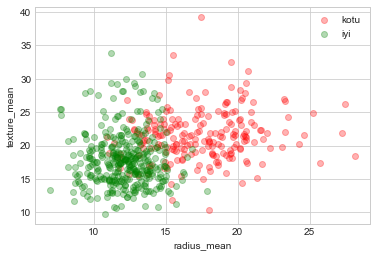

In [4]:
# prepare of data.diagnosis
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha=0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha=0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [5]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [6]:
# normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [7]:
# test test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

# SVM  Classification
<img src="img/SVM.png" alt="Support Vector Machine Notes">

In [8]:
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(x_train,y_train)

SVC(random_state=1)

In [9]:
print("print accuracy of svm algo : ", svm.score(x_test,y_test))

print accuracy of svm algo :  0.9649122807017544


# Navie Bayes Classification
<img src="img/NBS.png" alt="NBC">

In [10]:
# navi bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [11]:
print("print accuracy of nvb algo : ",nb.score(x_test,y_test))

print accuracy of nvb algo :  0.935672514619883


# Decision Tree Classification

<img src="img/Desicion-T.png" alt="NBC">

In [12]:
# test test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [13]:
# desicion tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
print("print decision tree score : ",dt.score(x_test,y_test))

print decision tree score :  0.9302325581395349


# Random Forest Classification

<img src="img/randomforest.png" alt="RF">

In [16]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train,y_train)
print("random forest algo result : ",rf.score(x_test,y_test))

random forest algo result :  0.9534883720930233


# Confusion Matrix

<img src="img/confusion-matrix.png" alt="ConfusionMatrix">

In [17]:
y_pred = rf.predict(x_test)
y_true = y_test

In [18]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
cm

array([[53,  1],
       [ 3, 29]])

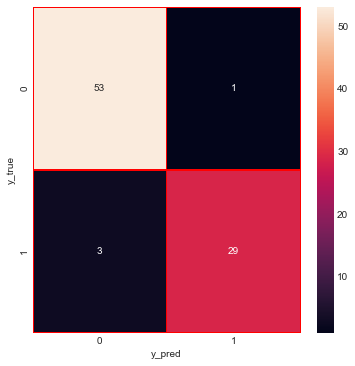

In [20]:
# cm visualization

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot=True,linewidths=0.7,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()